In [1]:
import pandas as pd
import math
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None
df=pd.read_csv('linkdin_Job_data.csv')
df.head()

,job_ID,job,location,company_id,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details,Column1
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,NaN,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,9 hours,3 company alumni,Shahid Ahmad,NaN,https://www.linkedin.com/in/shahid-ahmad-a2613...,About the job Profile: ML EngineersExperience:...,NaN
3,3472816027,Data Analyst,"Gurugram, Haryana, India",NaN,PVAR SERVICES,On-site,Full-time,1-10 employees,200,7 hours,NaN,Vartika Singh,"2,094 followers",https://www.linkedin.com/in/vartika-singh-,About the job Designation: Data AnalystLocatio...,NaN
4,3473311511,Data Analyst,"Mohali district, Punjab, India",NaN,Timeline Freight Brokers,On-site,Full-time,1-10 employees,8,26 minutes,1 company alumni,Manisha (Gisele Smith),NaN,https://www.linkedin.com/in/manisharathore0029,About the job The ideal candidate will use the...,NaN


**Data Summary**

The LinkedIn data set provided contains 7,927 rows and 15 columns, providing a comprehensive overview of job postings on the platform. The job postings include Data Analyst, Machine Learning Engineer, IT Services and IT Consulting roles, located in various locations around the world, with varying salaries and work hours. The data set includes information about the company, role responsibilities, and required skills for each job. This data set is a valuable resource for understanding job opportunities in different industries and locations.

2.Column descriptions
`job_ID`: Unique identifier for each job posting.

`job`: The title of the job posting.

`location`: The location of the job posting.

`company_id`: The unique identifier for the company offering the job.

`company_name`: The name of the company offering the job.

`work_type`: The type of work offered (e.g. full-time, part-time, etc.).

`full_time_remote`: Indicates if the job is a full-time remote position.

`no_of_employ`: The number of employees at the company offering the job.

`no_of_application`: The number of applications received for the job.

`posted_day_ago`: The number of days ago the job was posted.

`alumni`: Indicates if the job posting is for alumni of a certain organization.

`Hiring_person`: The name of the person responsible for hiring for the job.

`linkedin_followers`: The number of LinkedIn followers of the hiring person.

`hiring_person_link`: A link to the LinkedIn profile of the hiring person.

`job_details`: Detailed information about the job, including responsibilities and requirements.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7927 entries, 0 to 7926
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_ID              7927 non-null   int64  
 1   job                 7894 non-null   object 
 2   location            7894 non-null   object 
 3   company_id          0 non-null      float64
 4   company_name        7892 non-null   object 
 5   work_type           7736 non-null   object 
 6   full_time_remote    7848 non-null   object 
 7   no_of_employ        7603 non-null   object 
 8   no_of_application   7887 non-null   object 
 9   posted_day_ago      7920 non-null   object 
 10  alumni              4858 non-null   object 
 11  Hiring_person       5720 non-null   object 
 12  linkedin_followers  4814 non-null   object 
 13  hiring_person_link  5720 non-null   object 
 14  job_details         7881 non-null   object 
 15  Column1             0 non-null      float64
dtypes: flo

# Data Cleaning:

Droping job_id because it is not impostant for or analysis


In [3]:
df.drop('job_ID',inplace=True,axis=1)

**company_id**: This column is completely blank.`Completeness`

In [4]:
#Dropping the company-id column
df.drop('company_id',inplace=True, axis=1)
df.drop('Column1',inplace=True, axis=1)

Drop rows which containains null values for following columns

In [5]:
df.dropna(subset=['job','location','company_name','work_type','full_time_remote','no_of_employ','no_of_application','posted_day_ago','job_details'],inplace=True)
df.shape

(7430, 13)

 **Job**:

1)Column in the data set there is unnecessary information such as the yearly package, technology, company name, and work type (remote), etc added in the title.`Consistency`

 2)Some are starting with the capital letter and some are in small letter Consistency

In [6]:
import re
# Function to clean job titles
def clean_job_title(title):
    title = str(title)
    title = re.split(r',| - ', title)[0]
    return title.strip()


df['job'] = df['job'].apply(clean_job_title)
df['job'] = df['job'].str.title()


**posted_day_ago**: In this column, time is added in the form of a string for Exampal (9 hours, 8 minutes). `Validity`

In [7]:
# Function to convert time strings to days
def convert_to_days(value):
    value = str(value).lower().strip()
    days = 0

    # Extract numbers and units using regex
    match = re.match(r'(\d+)\s*(hours|minutes|days|day)', value)
    if match:
        num = int(match.group(1))
        unit = match.group(2)

        if unit in ['days', 'day']:
            days = num
        elif unit == 'hours':
            days = num / 24
        elif unit == 'minutes':
            days = num / (24 * 60)

    return round(days, 2)  # Round to 2 decimal places for consistency
df['posted_day_ago'] = df['posted_day_ago'].apply(convert_to_days)


**Hiring_person**: In this column, there are some nicknames added within parentheses `Consistency`

In [8]:
# Function to remove text inside parentheses
def remove_nickname(value):
    return re.sub(r'\s*\(.*?\)', '', str(value)).strip()  # Remove text within parentheses


mode=df['Hiring_person'].mode()[0]
df['Hiring_person'].fillna(mode,inplace=True)
df['Hiring_person'] = df['Hiring_person'].apply(remove_nickname)


**linkedin_followers**: In the linkedin_followers column the 'linkedin_followers' string is present with numbers and numbers are separated with (' , ') `Validity`

In [9]:
# Function to clean the linkedin_followers column
def clean_followers(value):
    if isinstance(value, (int, float)) and not math.isnan(value):
        return int(value)

    if isinstance(value, str):  # If it's a string
        match = re.search(r'[\d,]+', value)  # Extract numbers with commas
        if match:
            num_str = match.group().replace(',', '')  # Remove commas
            return int(num_str) if num_str.isdigit() else None  # Convert to int safely

    return None  # Return None for invalid cases


# Apply the function and update the column directly without using int()
df['linkedin_followers'] = df['linkedin_followers'].apply(clean_followers)


# Calculate the mean and fill NaN values
mean=round(df['linkedin_followers'].mean())
df['linkedin_followers'].fillna(mean,inplace=True)
df['linkedin_followers'] = df['linkedin_followers'].astype(int)

**Alumni**: with the alumni count the string is present with the count value ('company alumni'). `Validity`

In [10]:
# Function to clean the linkedin_followers column
def clean_followers(value):
    if isinstance(value, (int, float)) and not math.isnan(value):
        return int(value)

    if isinstance(value, str):  # If it's a string
        match = re.search(r'[\d,]+', value)  # Extract numbers with commas
        if match:
            num_str = match.group().replace(',', '')  # Remove commas
            return int(num_str) if num_str.isdigit() else None  # Convert to int safely

    return None  # Return None for invalid cases


# Apply the function and update the column directly without using int()
df['alumni'] = df['alumni'].apply(clean_followers)


# Calculate the mean and fill NaN values
mean=round(df['linkedin_followers'].mean())
df['alumni'].fillna(mean,inplace=True)
df['alumni'] = df['alumni'].astype(int)

**hiring_person_link**: Filling empty cells

In [11]:
mode=df['hiring_person_link'].mode()[0]
df['hiring_person_link'].fillna(mode,inplace=True)


**no_of_application**: this column has a value that should not be present ('hours', 'minutes'). `Consistency`

In [12]:
def clean_no_of_applications(value):
    if isinstance(value, str):  # Check if value is a string
        match = re.search(r'\d+', value)  # Extract numbers
        if match:
            return int(match.group())  # Convert to int
    return None  # Return None for invalid values

# Apply the function and update the column directly
df['no_of_application'] = df['no_of_application'].apply(clean_no_of_applications)

# Calculate the mean and fill NaN values with the mean
mean = round(df['no_of_application'].mean())
df['no_of_application'].fillna(mean, inplace=True)

# Convert the column to int after filling NaN values
df['no_of_application'] = df['no_of_application'].astype(int)

**Full_time_remote**: In this column involvement and level are both combined in one column and separated by ('·'). `Validity`

In [13]:
# Split the column by '·' and expand into two new columns
df[['Involvement', 'Level']] = df['full_time_remote'].str.split('·', n=1, expand=True)

# Trim spaces for cleanliness
df['Involvement'] = df['Involvement'].str.strip()
df = df[~df['Involvement'].str.contains(r'\d{1,3}[,-]\d{1,3} employees|\d+ employees', regex=True, na=False)]


df['Level'] = df['Level'].str.strip()
mode=df['Level'].mode()[0]
df['Level'].fillna(mode,inplace=True)
df.drop('full_time_remote',inplace=True, axis=1)

**No_of_employ**: In this column employees_count and industry are both combined in one column and the 'employees' string is added extra separated ('·'). `Validity`

In [14]:
# Split the column by '·' and expand into two new columns
df[['employees_count', 'industry']] = df['no_of_employ'].str.split('·', n=1, expand=True)

# Remove the "employees" string and extra spaces
df['employees_count'] = df['employees_count'].str.replace('employees', '', regex=True).str.strip()
df['industry'] = df['industry'].str.strip()
mode=df['industry'].mode()[0]
df['industry'].fillna(mode,inplace=True)
df.drop('no_of_employ',inplace=True, axis=1)

**company_name**: in the company_name also there is inconsistency in the name some of the letters are starting with a small letter and some of them are stares with the capital letter. `Consistency`

In [15]:
df['company_name'] = df['company_name'].str.title()

In [16]:
df.duplicated().sum()

87

In [17]:
df.head()

,job,location,company_name,work_type,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details,Involvement,Level,employees_count,industry
0,Data Analyst,"Delhi, Delhi, India",Crossover,Remote,200,0.33,12,Ekaterina Costyshko,5395547,https://www.linkedin.com/in/ekaterina-costyshk...,About the job Crossover is the world's #1 sour...,Full-time,Associate,"1,001-5,000",IT Services and IT Consulting
1,Data Analyst,"New Delhi, Delhi, India",Crossover,Remote,184,0.33,12,Ekaterina Costyshko,5395547,https://www.linkedin.com/in/ekaterina-costyshk...,About the job Crossover is the world's #1 sour...,Full-time,Associate,"1,001-5,000",IT Services and IT Consulting
2,Data Analyst,Greater Bengaluru Area,Uplers,Remote,200,0.38,3,Shahid Ahmad,1134034,https://www.linkedin.com/in/shahid-ahmad-a2613...,About the job Profile: ML EngineersExperience:...,Full-time,Mid-Senior level,"1,001-5,000",IT Services and IT Consulting
3,Data Analyst,"Gurugram, Haryana, India",Pvar Services,On-site,200,0.29,1134034,Vartika Singh,2094,https://www.linkedin.com/in/vartika-singh-,About the job Designation: Data AnalystLocatio...,Full-time,Mid-Senior level,1-10,IT Services and IT Consulting
4,Data Analyst,"Mohali district, Punjab, India",Timeline Freight Brokers,On-site,8,0.02,1,Manisha,1134034,https://www.linkedin.com/in/manisharathore0029,About the job The ideal candidate will use the...,Full-time,Mid-Senior level,1-10,IT Services and IT Consulting


In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7340 entries, 0 to 7926
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job                 7340 non-null   object 
 1   location            7340 non-null   object 
 2   company_name        7340 non-null   object 
 3   work_type           7340 non-null   object 
 4   no_of_application   7340 non-null   int64  
 5   posted_day_ago      7340 non-null   float64
 6   alumni              7340 non-null   int64  
 7   Hiring_person       7340 non-null   object 
 8   linkedin_followers  7340 non-null   int64  
 9   hiring_person_link  7340 non-null   object 
 10  job_details         7340 non-null   object 
 11  Involvement         7340 non-null   object 
 12  Level               7340 non-null   object 
 13  employees_count     7340 non-null   object 
 14  industry            7340 non-null   object 
dtypes: float64(1), int64(3), object(11)
memory usage: 917.5+ KB


<Axes: >

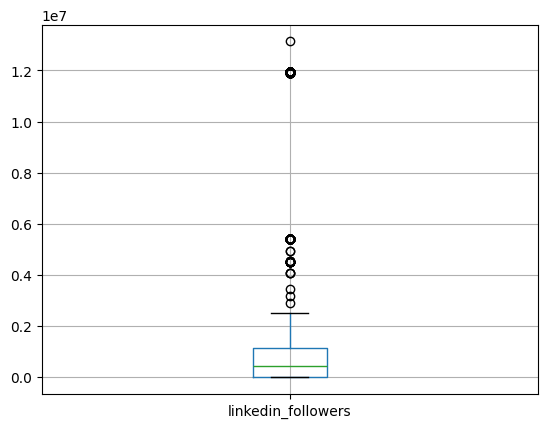

In [20]:
df.boxplot(column=['linkedin_followers'])

<Axes: >

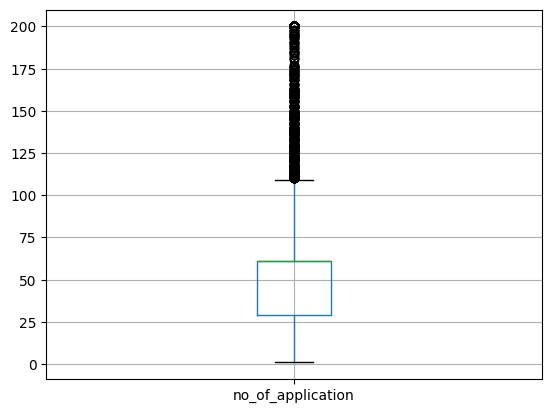

In [21]:
df.boxplot(column=['no_of_application'])

<Axes: >

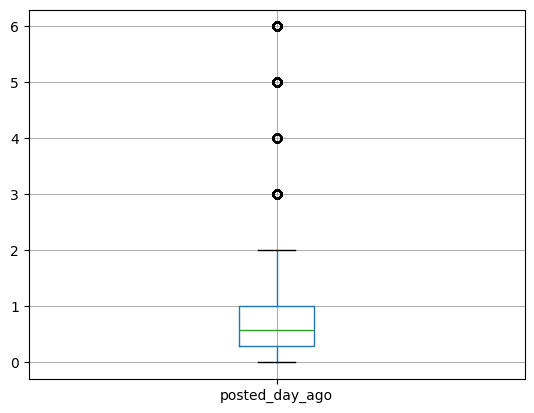

In [22]:
df.boxplot(column=['posted_day_ago'])

<Axes: >

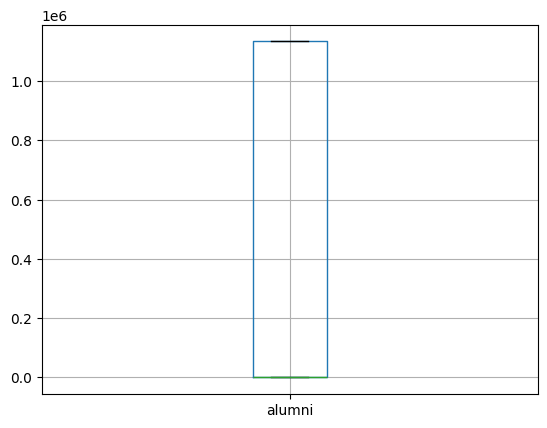

In [23]:
df.boxplot(column=['alumni'])

Identifying outliers and handling them

In [24]:
#Removing outliers for posted_day_ago
iqr = df['posted_day_ago'].quantile(0.75) - df['posted_day_ago'].quantile(0.25)
lower_bound = df['posted_day_ago'].quantile(0.25) - 1.5 * iqr
upper_bound = df['posted_day_ago'].quantile(0.75) + 1.5 * iqr
mean_value = df[(df['posted_day_ago'] >= lower_bound) & (df['posted_day_ago'] <= upper_bound)]['posted_day_ago'].mean()

# Replace outliers with mean
df['posted_day_ago'] = df['posted_day_ago'].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)

In [25]:
#Removing outliers for linkedin_followers
iqr = df['linkedin_followers'].quantile(0.75) - df['linkedin_followers'].quantile(0.25)
lower_bound = df['linkedin_followers'].quantile(0.25) - 1.5 * iqr
upper_bound = df['linkedin_followers'].quantile(0.75) + 1.5 * iqr
mean_value = df[(df['linkedin_followers'] >= lower_bound) & (df['linkedin_followers'] <= upper_bound)]['linkedin_followers'].mean()

# Replace outliers with mean
df['linkedin_followers'] = df['linkedin_followers'].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)


In [26]:
#Removing outliers for no_of_application
iqr = df['no_of_application'].quantile(0.75) - df['no_of_application'].quantile(0.25)
lower_bound = df['no_of_application'].quantile(0.25) - 1.5 * iqr
upper_bound = df['no_of_application'].quantile(0.75) + 1.5 * iqr
mean_value = df[(df['no_of_application'] >= lower_bound) & (df['no_of_application'] <= upper_bound)]['no_of_application'].mean()

# Replace outliers with mean
df['no_of_application'] = df['no_of_application'].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)


# Exploratory Data Analysis (EDA):

In [27]:
df.describe()

,no_of_application,posted_day_ago,alumni,linkedin_followers
count,7340.000000,7340.000000,7.340000e+03,7.340000e+03
mean,46.765697,0.618239,4.086897e+05,5.610057e+05
std,23.010112,0.512276,5.439847e+05,5.063347e+05
min,1.000000,0.000000,1.000000e+00,3.000000e+00
25%,29.000000,0.290000,3.000000e+00,1.858300e+04
50%,61.000000,0.580000,5.800000e+01,4.502225e+05
75%,61.000000,0.710000,1.134034e+06,1.134034e+06
max,109.000000,2.000000,1.134034e+06,2.497115e+06


## Univariate Analysis (Single-Variable Exploration)

### Summary statistics (mean, median, mode, variance, skewness, etc.).

In [28]:
#linkedin_followers
mean=round(df['linkedin_followers'].mean())
median=df['linkedin_followers'].median()
mode=df['linkedin_followers'].mode()[0]
variance=df['linkedin_followers'].var()
skewness=df['linkedin_followers'].skew()
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Variance: {variance}")
print(f"Skewness: {skewness}")

Mean: 561006
Median: 450222.5
Mode: 1134034.0
Variance: 256374862571.87268
Skewness: 0.23296326836186315


In [29]:
#posted_days_ago
mean=round(df['posted_day_ago'].mean())
median=df['posted_day_ago'].median()
mode=df['posted_day_ago'].mode()[0]
variance=df['posted_day_ago'].var()
skewness=df['posted_day_ago'].skew()
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Variance: {variance}")
print(f"Skewness: {skewness}")

Mean: 1
Median: 0.58
Mode: 0.6182393810200537
Variance: 0.26242644353431754
Skewness: 1.4640101369359673


In [30]:
#no_of_application
mean=round(df['no_of_application'].mean())
median=df['no_of_application'].median()
mode=df['no_of_application'].mode()[0]
variance=df['no_of_application'].var()
skewness=df['no_of_application'].skew()
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Variance: {variance}")
print(f"Skewness: {skewness}")

Mean: 47
Median: 61.0
Mode: 61.0
Variance: 529.4652563128075
Skewness: -0.7260294243388284


In [31]:
#alumni
mean=round(df['alumni'].mean())
median=df['alumni'].median()
mode=df['alumni'].mode()[0]
variance=df['alumni'].var()
skewness=df['alumni'].skew()
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Variance: {variance}")
print(f"Skewness: {skewness}")

Mean: 408690
Median: 58.0
Mode: 1134034
Variance: 295919371014.72845
Skewness: 0.5836560634540423


### Frequency distributions for categorical variables.

In [32]:
#Job
df['job'].value_counts()

,count
job,
Lead Java Software Engineer,168
Data Engineer,153
Senior Automation Tester,140
Business Analyst,135
Lead Java Developer,118
...,...
Business Development Executive(B2C Sales),1
Senior Dsp Group Director,1
Robotics Tutor,1


In [33]:
#Location
df['location'].value_counts()

,count
location,
"Bengaluru, Karnataka, India",1211
India,784
"Hyderabad, Telangana, India",602
"Gurugram, Haryana, India",456
"Chennai, Tamil Nadu, India",451
...,...
"Agra, Uttar Pradesh, India",1
"Ranchi, Jharkhand, India",1
"Udaipur, Rajasthan, India",1


In [34]:
# Company_name
df['company_name'].value_counts()

,count
company_name,
Epam Anywhere,1481
Tata Consultancy Services,376
Uplers,293
Crossover,129
Virtusa,89
...,...
Accenture In India,1
Agco Corporation,1
Athena Education,1


In [35]:
#Work_type
df['work_type'].value_counts()

,count
work_type,
On-site,3049
Remote,2896
Hybrid,1395


In [36]:
#Hiring_person
df['Hiring_person'].value_counts()

,count
Hiring_person,
Ekaterina Costyshko,2264
Tatsiana Sadovskaya,215
Anastasiya Volkova,178
Aliaksandra Shauchuk,109
Shahid Ahmad,52
...,...
Gourav Singh Rao Ajmer,1
Meghana G,1
Smitha Machaiah,1


In [37]:
#Involvement
df['Involvement'].value_counts()

,count
Involvement,
Full-time,6849
Contract,296
Internship,145
Part-time,42
Temporary,3
Volunteer,3
Associate,2


In [38]:
#Level
df['Level'].value_counts()

,count
Level,
Mid-Senior level,6472
Associate,586
Entry level,193
Executive,48
Director,31
Internship,10


In [39]:
#industry
df['industry'].value_counts()

,count
industry,
IT Services and IT Consulting,5741
Software Development,206
Information Technology & Services,186
"Technology, Information and Internet",142
Staffing and Recruiting,125
...,...
Utilities,1
Consumer Electronics,1
International Trade and Development,1


In [40]:
#employee_count
df['employees_count'].value_counts()

,count
employees_count,
"1,001-5,000",2509
"10,001+",1278
51-200,1106
11-50,1065
201-500,503
"501-1,000",407
1-10,297
"5,001-10,000",175


In [41]:
#hiring_person_link
df['hiring_person_link'].value_counts()

,count
hiring_person_link,
https://www.linkedin.com/in/ekaterina-costyshko-1a532020a,2264
https://www.linkedin.com/in/tatsiana-sadovskaya-b39496207,215
https://www.linkedin.com/in/anastasiya-volkova-ab8a1a199,178
https://www.linkedin.com/in/aliaksandra-shauchuk-961a0520a,109
https://www.linkedin.com/in/shahid-ahmad-a26130177,52
...,...
https://www.linkedin.com/in/rutbah-modi-a0779366,1
https://www.linkedin.com/in/rajni-khanna-443670224,1
https://www.linkedin.com/in/prem-sagar-b-5047291ba,1


### Histograms and box plots to visualize distributions.

<Axes: ylabel='Frequency'>

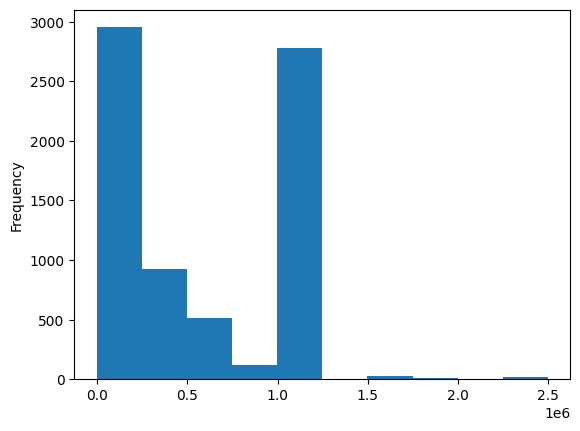

In [42]:
#linkedin_followers
df['linkedin_followers'].plot(kind='hist', bins=10)
plt.show()

<Axes: ylabel='Frequency'>

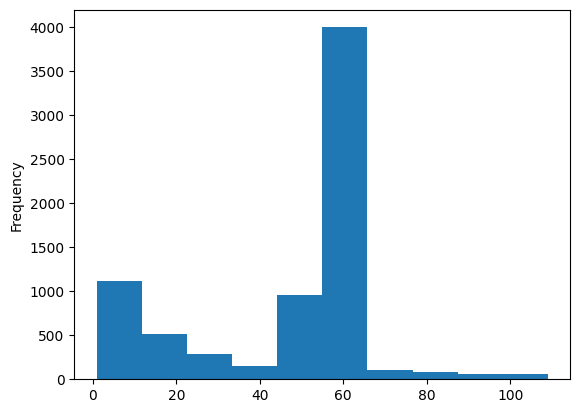

In [43]:
#no_of_application
df['no_of_application'].plot(kind='hist', bins=10)
plt.show()

<Axes: ylabel='Frequency'>

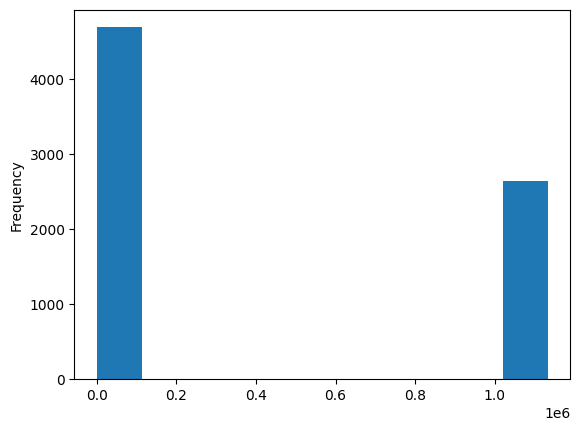

In [44]:
#alumni
df['alumni'].plot(kind='hist', bins=10)
plt.show()

<Axes: ylabel='Frequency'>

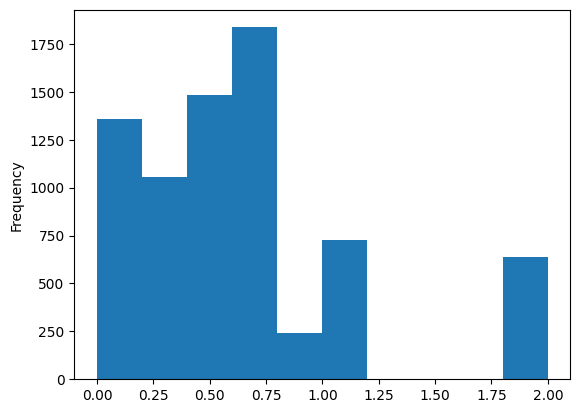

In [45]:
#posted_days_ago
df['posted_day_ago'].plot(kind='hist', bins=10)
plt.show()

<Axes: xlabel='work_type'>

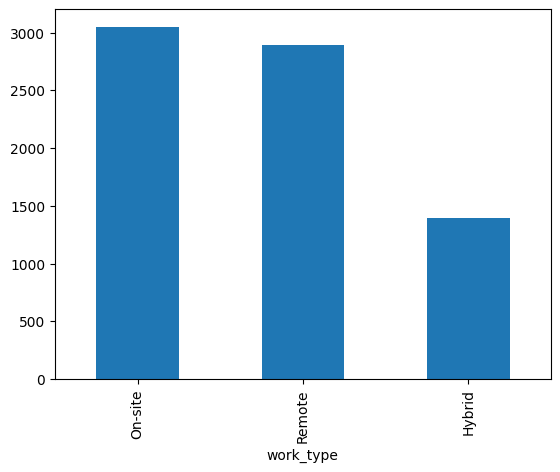

In [46]:
#Work_Type
df['work_type'].value_counts().plot(kind='bar')
plt.show()

<Axes: xlabel='Involvement'>

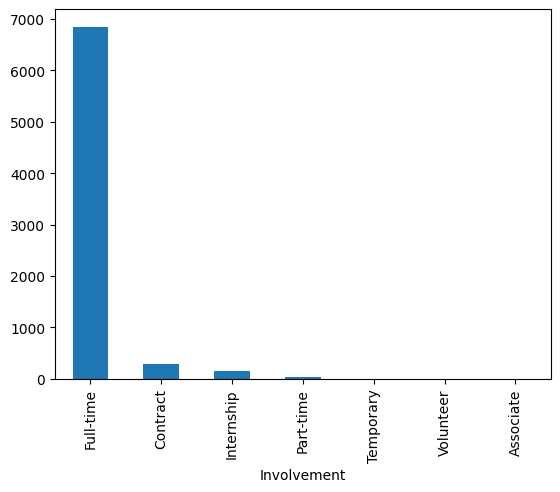

In [47]:
#Involvement
df['Involvement'].value_counts().plot(kind='bar')
plt.show()

<Axes: xlabel='Level'>

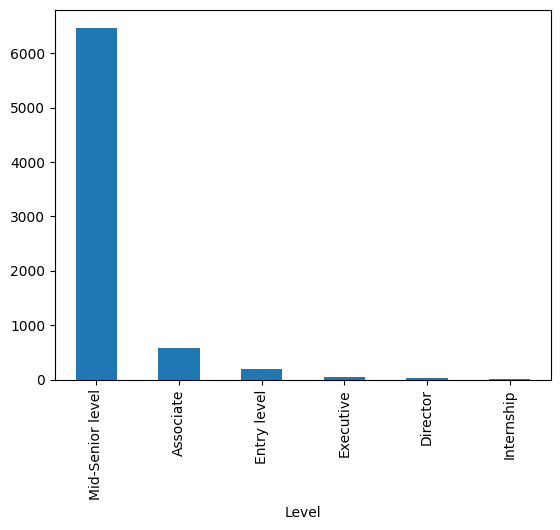

In [48]:
#Level
df['Level'].value_counts().plot(kind='bar')
plt.show()

<Axes: >

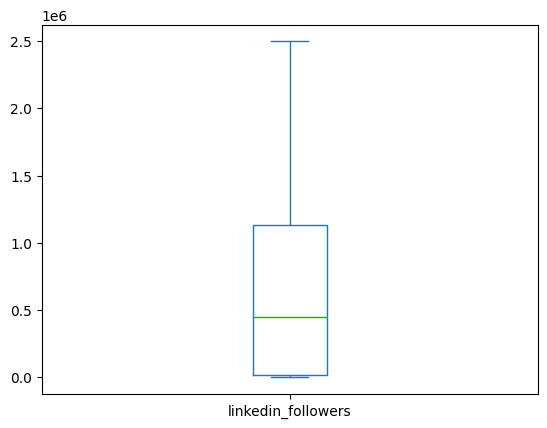

In [49]:
#linkedin_followers
df['linkedin_followers'].plot(kind='box')
plt.show()

<Axes: >

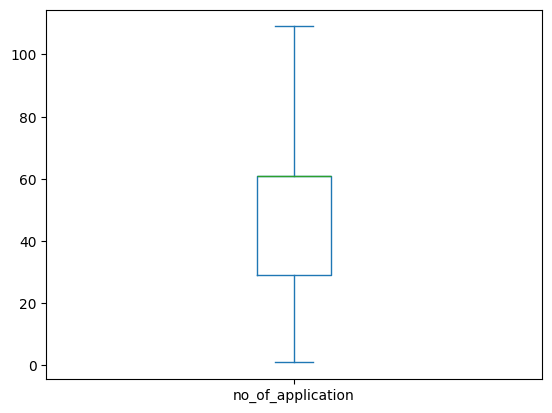

In [50]:
#no_of_application
df['no_of_application'].plot(kind='box')
plt.show()

<Axes: >

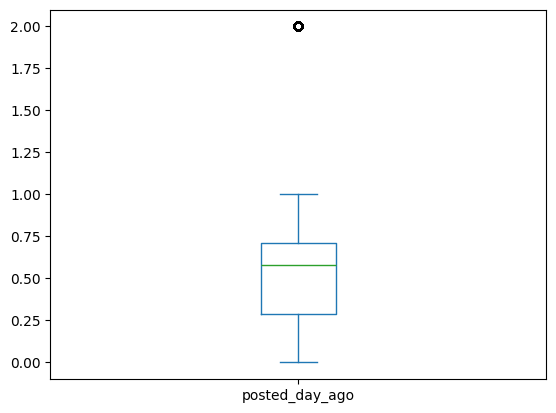

In [51]:
#posted_days_ago
df['posted_day_ago'].plot(kind='box')
plt.show()

<Axes: >

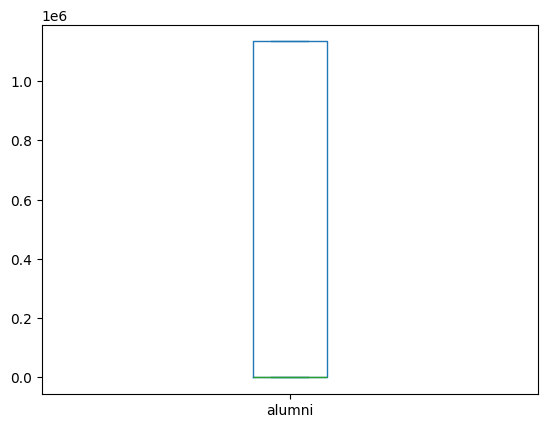

In [52]:
#alumni
df['alumni'].plot(kind='box')
plt.show()

## Bivariate Analysis (Two-Variable Exploration)

### Correlation matrix to identify relationships between numerical variables.

In [53]:
#correlation matrix for  numerical variables
import seaborn as sns
import matplotlib.pyplot as plt
numerical_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numerical_df.corr()

print(corr_matrix)


                    no_of_application  posted_day_ago    alumni  \
no_of_application            1.000000        0.075814 -0.209772   
posted_day_ago               0.075814        1.000000  0.039717   
alumni                      -0.209772        0.039717  1.000000   
linkedin_followers           0.164041       -0.045697 -0.500046   

                    linkedin_followers  
no_of_application             0.164041  
posted_day_ago               -0.045697  
alumni                       -0.500046  
linkedin_followers            1.000000  


### Scatter plots for continuous variable relationships.

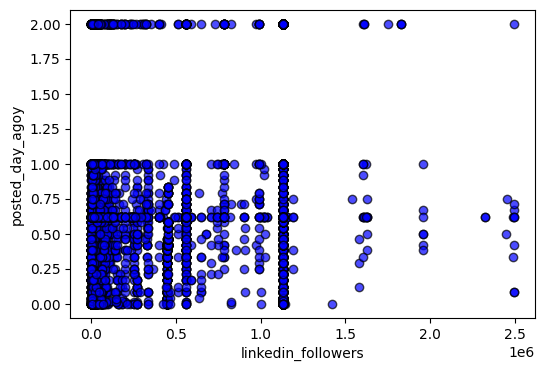

In [54]:
#linkedin_followers vs posted_day_ago
plt.figure(figsize=(6, 4))
plt.scatter(df['linkedin_followers'], df['posted_day_ago'], color='blue', alpha=0.7, edgecolors='black')

# Add labels and title
plt.xlabel('linkedin_followers')
plt.ylabel('posted_day_agoy')

# Show the plot
plt.show()

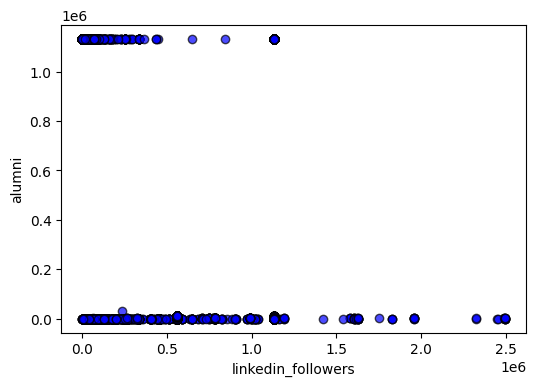

In [55]:
#linkedin_followers vs alumni
plt.figure(figsize=(6, 4))
plt.scatter(df['linkedin_followers'], df['alumni'], color='blue', alpha=0.7, edgecolors='black')

# Add labels and title
plt.xlabel('linkedin_followers')
plt.ylabel('alumni')

plt.show()

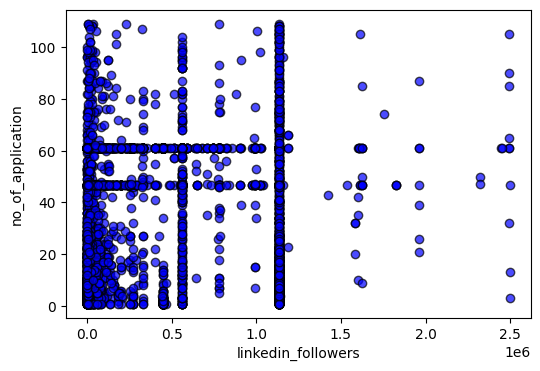

In [56]:
#linkedin_followers vs no_of_application
plt.figure(figsize=(6, 4))
plt.scatter(df['linkedin_followers'], df['no_of_application'], color='blue', alpha=0.7, edgecolors='black')

# Add labels and title
plt.xlabel('linkedin_followers')
plt.ylabel('no_of_application')

plt.show()

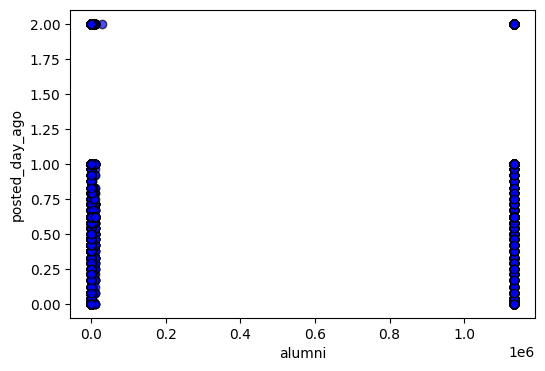

In [57]:
#alumni vs posted_day_ago
plt.figure(figsize=(6, 4))
plt.scatter(df['alumni'], df['posted_day_ago'], color='blue', alpha=0.7, edgecolors='black')

plt.xlabel('alumni')
plt.ylabel('posted_day_ago')

plt.show()

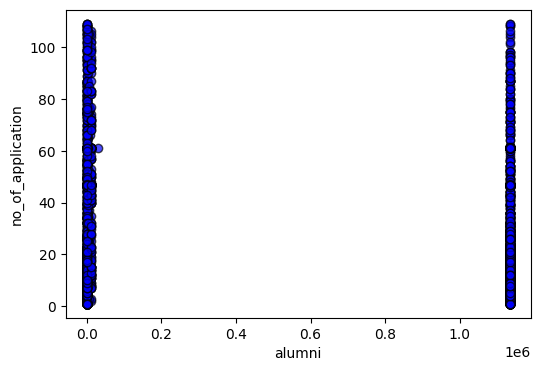

In [58]:
#alumni vs no_of_application
plt.figure(figsize=(6, 4))
plt.scatter(df['alumni'], df['no_of_application'], color='blue', alpha=0.7, edgecolors='black')

plt.xlabel('alumni')
plt.ylabel('no_of_application')

plt.show()

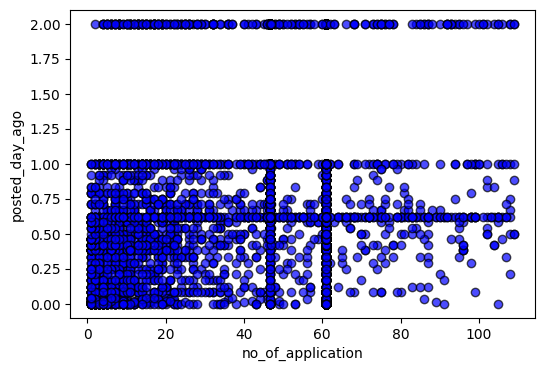

In [59]:
#no_of_application vs posted_day_ago
plt.figure(figsize=(6, 4))
plt.scatter(df['no_of_application'], df['posted_day_ago'], color='blue', alpha=0.7, edgecolors='black')

plt.xlabel('no_of_application')
plt.ylabel('posted_day_ago')

plt.show()

### Bar plots, violin plots, and box plots to compare categorical and numerical variables.

Text(0, 0.5, 'linkedin_followers')

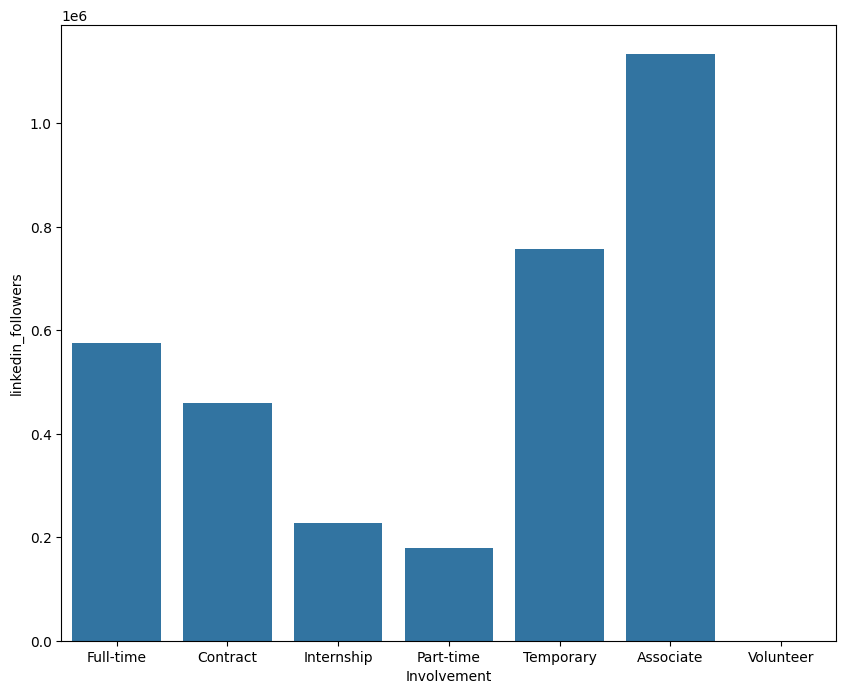

In [60]:
#Bar plot Involvement and linkedin_followers
plt.figure(figsize=(10,8))
sns.barplot(x='Involvement', y='linkedin_followers', data=df,errorbar=None)
plt.xlabel('Involvement')
plt.ylabel('linkedin_followers')
plt.show()

Text(0, 0.5, 'linkedin_followers')

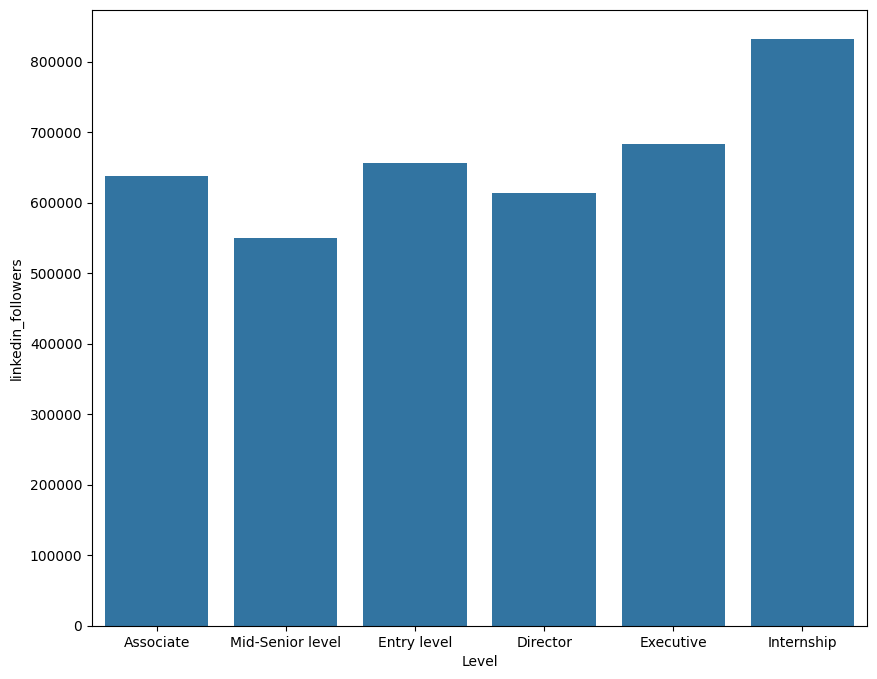

In [61]:
#Level vs linkedin_followers
plt.figure(figsize=(10,8))
sns.barplot(x='Level', y='linkedin_followers', data=df,errorbar=None)
plt.xlabel('Level')
plt.ylabel('linkedin_followers')
plt.show()

Text(0, 0.5, 'alumni')

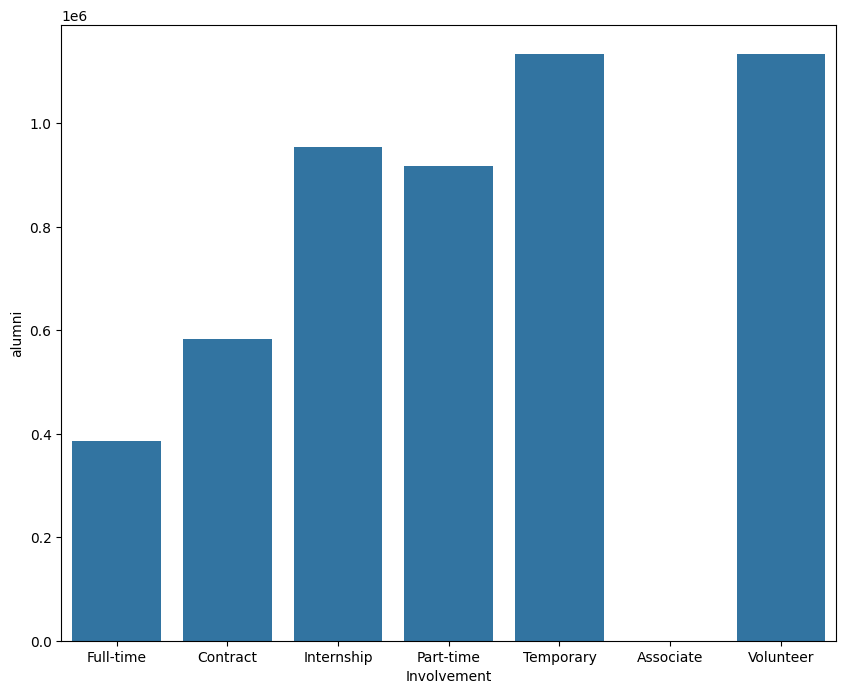

In [62]:
#Involvement vs alumni
plt.figure(figsize=(10,8))
sns.barplot(x='Involvement', y='alumni', data=df,errorbar=None)
plt.xlabel('Involvement')
plt.ylabel('alumni')
plt.show()

Text(0, 0.5, 'no_of_application')

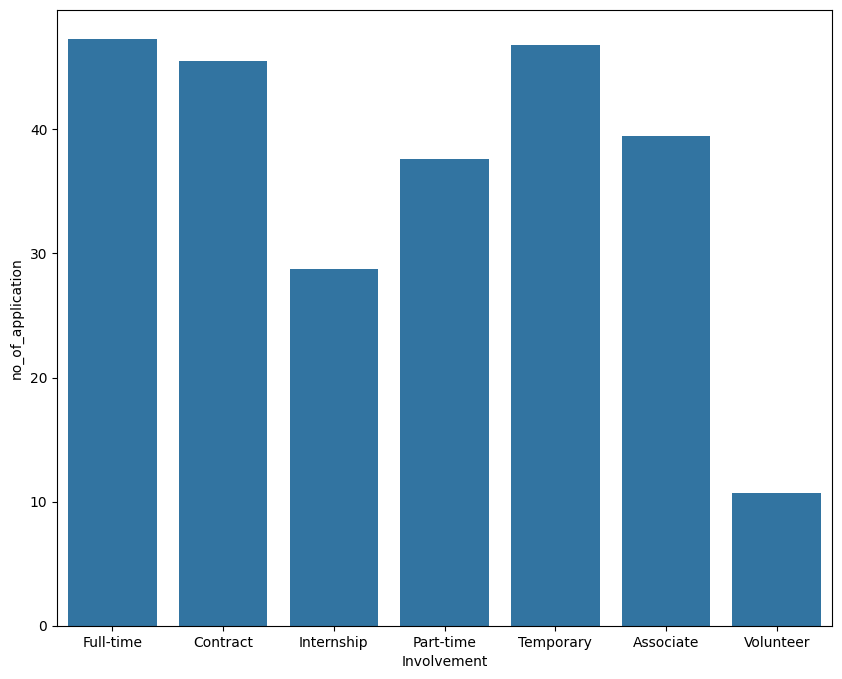

In [63]:
#Involvement vs no_of_application
plt.figure(figsize=(10,8))
sns.barplot(x='Involvement', y='no_of_application', data=df,errorbar=None)
plt.xlabel('Involvement')
plt.ylabel('no_of_application')
plt.show()

Text(0, 0.5, 'alumni')

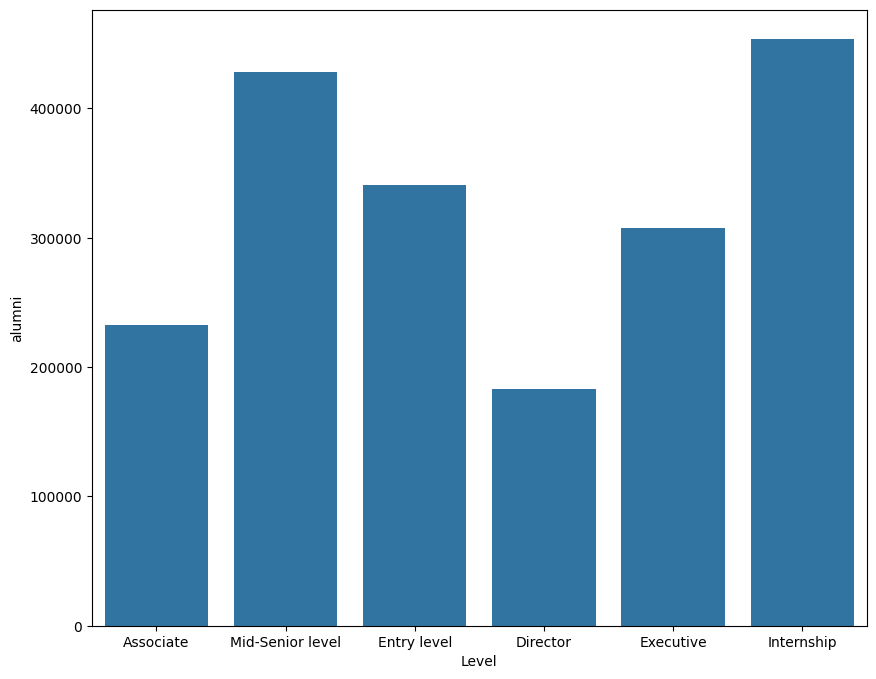

In [64]:
#Level vs alumni
plt.figure(figsize=(10,8))
sns.barplot(x='Level', y='alumni', data=df,errorbar=None)
plt.xlabel('Level')
plt.ylabel('alumni')
plt.show()

Text(0, 0.5, 'linkedin_followers')

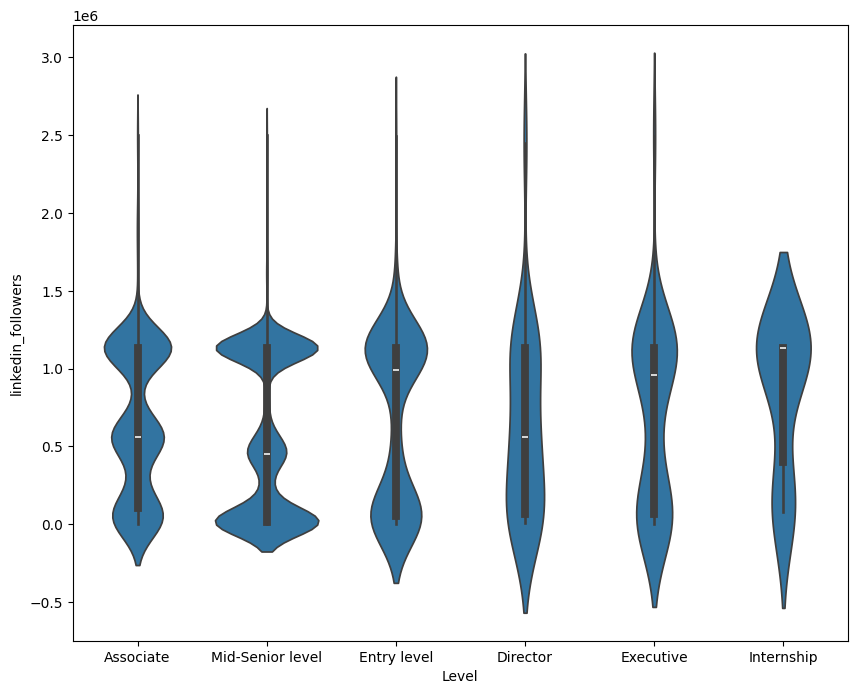

In [65]:
#Violin plot
plt.figure(figsize=(10,8))
sns.violinplot(x='Level', y='linkedin_followers', data=df)
plt.xlabel('Level')
plt.ylabel('linkedin_followers')
plt.show()

Text(0, 0.5, 'linkedin_followers')

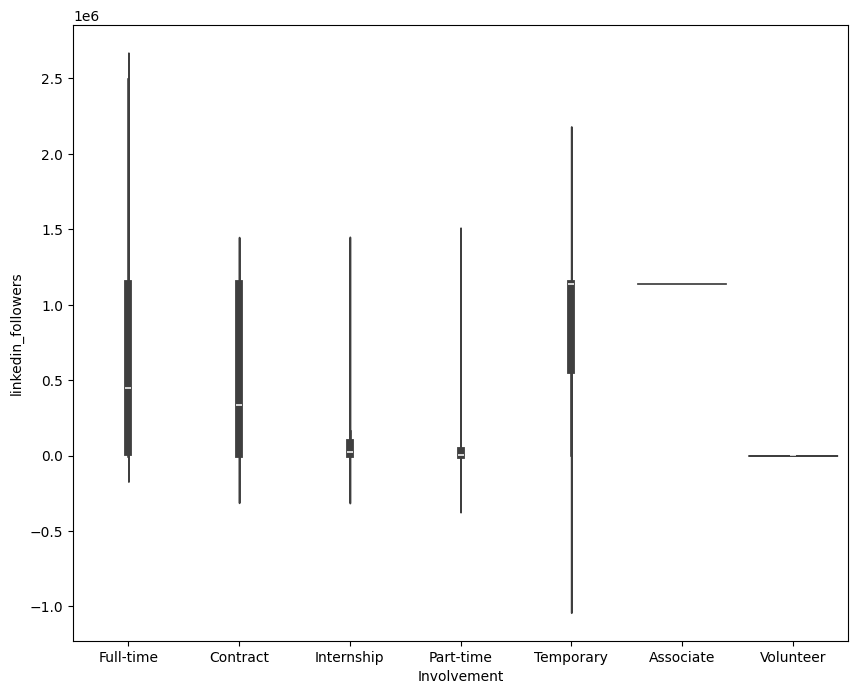

In [66]:
#Involvement vs linkedin_followers
plt.figure(figsize=(10,8))
sns.violinplot(x='Involvement', y='linkedin_followers', data=df)
plt.xlabel('Involvement')
plt.ylabel('linkedin_followers')
plt.show()

Text(0, 0.5, 'no_of_application')

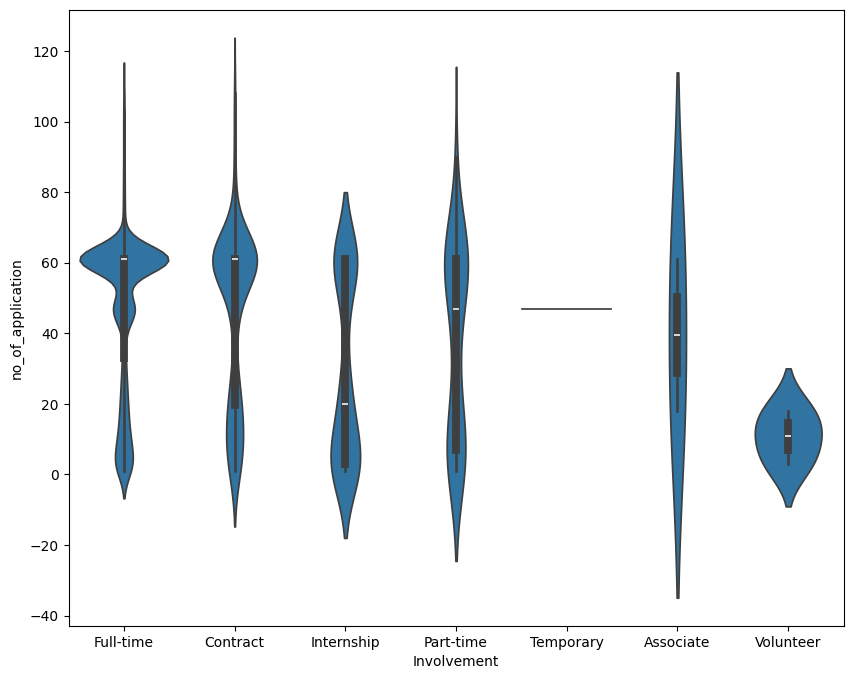

In [67]:
#Involvement vs no_of_applicaions
plt.figure(figsize=(10,8))
sns.violinplot(x='Involvement', y='no_of_application', data=df)
plt.xlabel('Involvement')
plt.ylabel('no_of_application')
plt.show()

Text(0, 0.5, 'alumni')

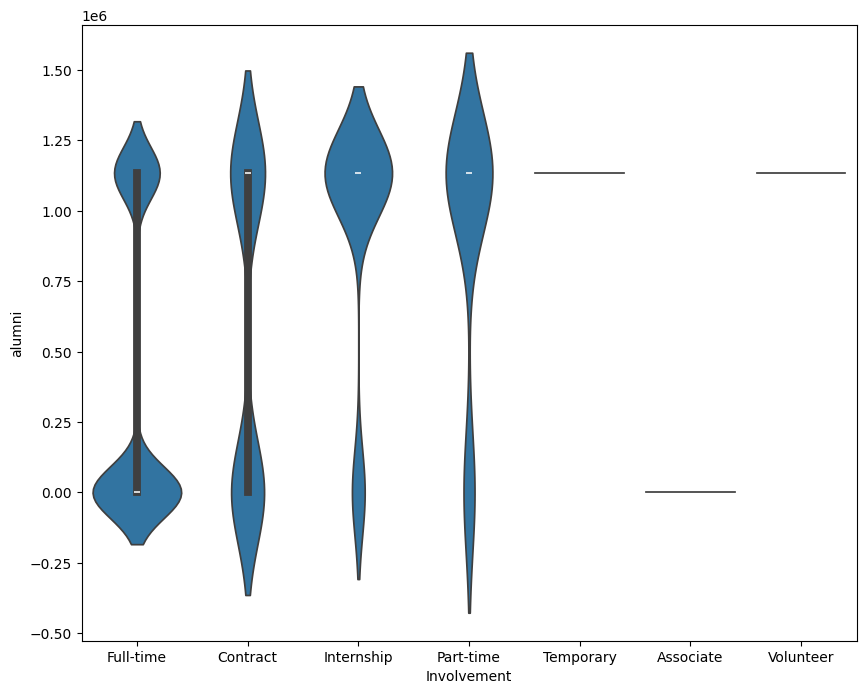

In [68]:
#Involvement vs alumni
plt.figure(figsize=(10,8))
sns.violinplot(x='Involvement', y='alumni', data=df)
plt.xlabel('Involvement')
plt.ylabel('alumni')
plt.show()

Text(0, 0.5, 'linkedin_followers')

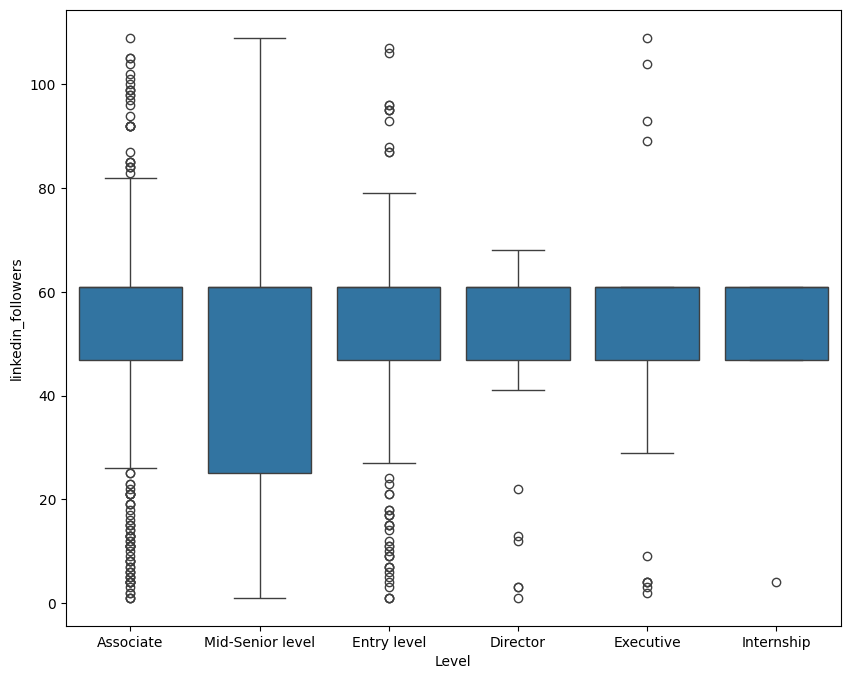

In [69]:
#Box plot
plt.figure(figsize=(10,8))
sns.boxplot(x='Level', y='no_of_application', data=df)
plt.xlabel('Level')
plt.ylabel('linkedin_followers')
plt.show()

Text(0, 0.5, 'no_of_application')

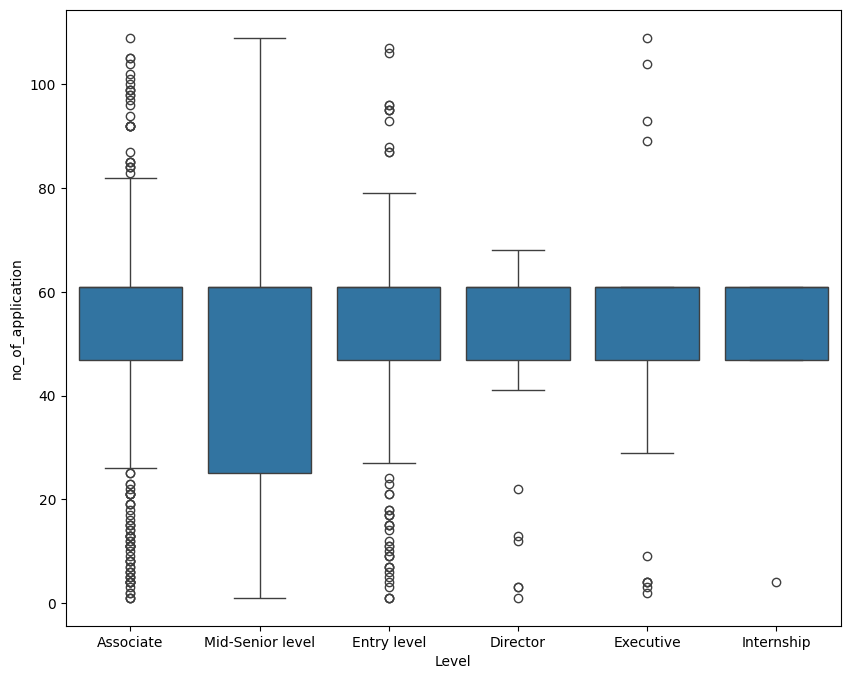

In [70]:
#Level vs no_of_application
plt.figure(figsize=(10,8))
sns.boxplot(x='Level', y='no_of_application', data=df)
plt.xlabel('Level')
plt.ylabel('no_of_application')
plt.show()

Text(0, 0.5, 'alumni')

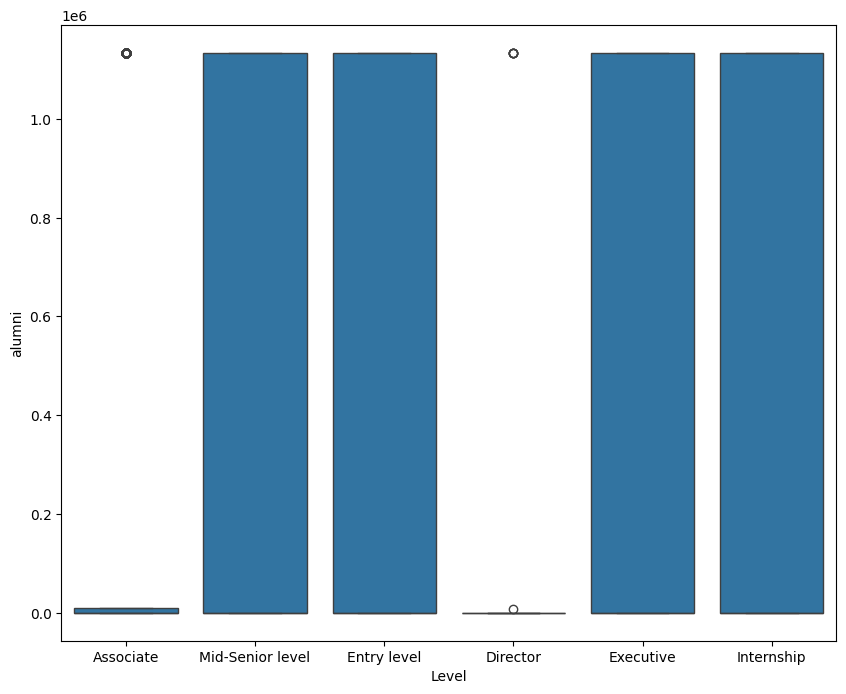

In [71]:
#Level vs alumni
plt.figure(figsize=(10,8))
sns.boxplot(x='Level', y='alumni', data=df)
plt.xlabel('Level')
plt.ylabel('alumni')
plt.show()

## Multivariate Analysis (Multiple Variables Exploration)

### Pair plots to analyze multiple relationships simultaneously.

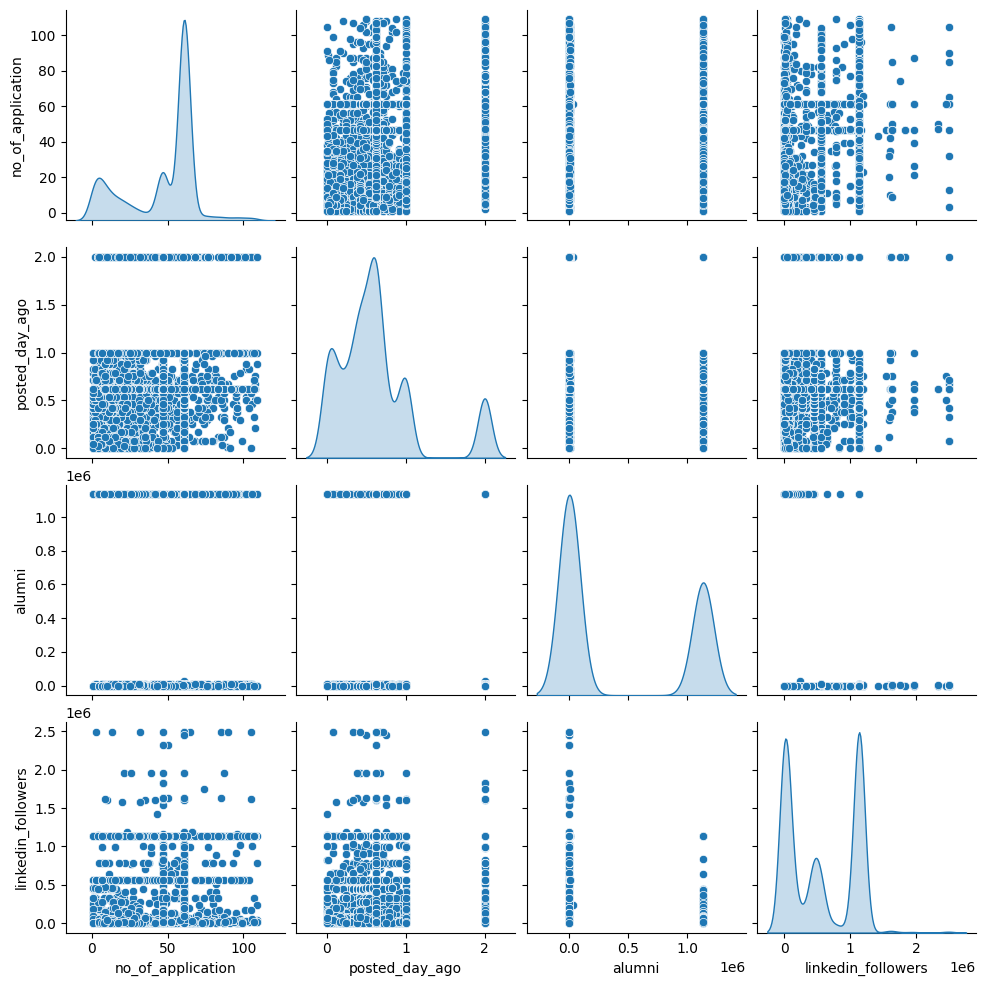

In [72]:
# Creating Pair Plot
sns.pairplot(df, diag_kind='kde')

# Show Plot
plt.show()

### Heatmaps to visualize correlations among multiple variables.

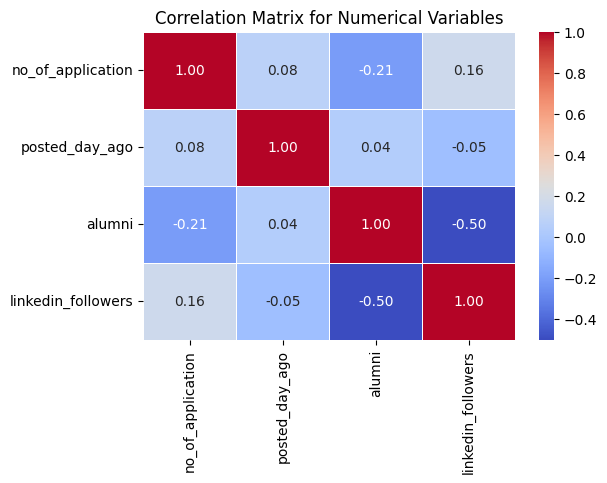

In [73]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Numerical Variables")
plt.show()

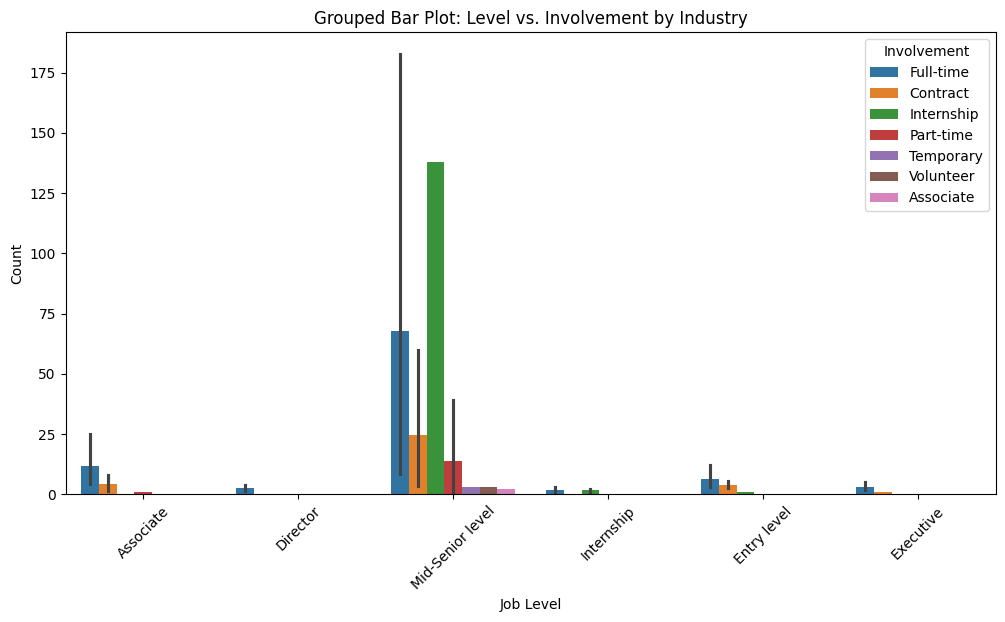

In [78]:
df_count = df.groupby(['industry', 'Level', 'Involvement'], as_index=False).size()

# Rename the size column to 'Count'
df_count.rename(columns={'size': 'Count'}, inplace=True)

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_count,
    x='Level',
    y='Count',
    hue='Involvement'
)

plt.title('Grouped Bar Plot: Level vs. Involvement by Industry')
plt.xlabel('Job Level')
plt.ylabel('Count')
plt.legend(title='Involvement')
plt.xticks(rotation=45)
plt.show()

In [79]:
# Create a contingency table
contingency_table = pd.crosstab(df['Level'], df['industry'])

# Display the table
print(contingency_table)

industry          Accounting  Advertising Services  Airlines and Aviation  \
Level                                                                       
Associate                  2                     7                      0   
Director                   1                     0                      0   
Entry level                0                     0                      5   
Executive                  0                     0                      0   
Internship                 0                     1                      0   
Mid-Senior level           9                    27                      3   

industry          Apparel & Fashion  \
Level                                 
Associate                         3   
Director                          0   
Entry level                       0   
Executive                         0   
Internship                        0   
Mid-Senior level                  0   

industry          Appliances, Electrical, and Electronics Manufacturin

In [81]:
# Create a contingency table
contingency_table = pd.crosstab(df['Level'], df['Involvement'])

# Display the table
print(contingency_table)

Involvement       Associate  Contract  Full-time  Internship  Part-time  \
Level                                                                     
Associate                 0        30        555           0          1   
Director                  0         0         31           0          0   
Entry level               0        19        172           2          0   
Executive                 0         1         47           0          0   
Internship                0         0          5           5          0   
Mid-Senior level          2       246       6039         138         41   

Involvement       Temporary  Volunteer  
Level                                   
Associate                 0          0  
Director                  0          0  
Entry level               0          0  
Executive                 0          0  
Internship                0          0  
Mid-Senior level          3          3  


In [82]:
# Create a contingency table
contingency_table = pd.crosstab(df['Involvement'], df['industry'])

# Display the table
print(contingency_table)

industry     Accounting  Advertising Services  Airlines and Aviation  \
Involvement                                                            
Associate             0                     0                      0   
Contract              0                     3                      0   
Full-time            12                    31                      8   
Internship            0                     1                      0   
Part-time             0                     0                      0   
Temporary             0                     0                      0   
Volunteer             0                     0                      0   

industry     Apparel & Fashion  \
Involvement                      
Associate                    0   
Contract                     0   
Full-time                    3   
Internship                   0   
Part-time                    0   
Temporary                    0   
Volunteer                    0   

industry     Appliances, Electrical, and Ele